## 5.2 Minimos quadrados: caso contínuo

No caso da função $f(x)$ ser conhecida, podemos ajustar a função $g(x)$ de modo a minimizar 

$$ E = \int_a^b [e(x)]^2 dx = \int_a^b [f(x)-g(x)]^2 dx$$

o que leva a necessidade de resolução do sistema linear

$$\left[\begin{array}{cccc}
	         \langle g_1,g_1 \rangle &\langle g_1,g_2 \rangle &... &\langle g_1,g_n \rangle\\ 
	         \langle g_2,g_1 \rangle &\langle g_2,g_2 \rangle &... &\langle g_2,g_n \rangle\\  
             \vdots \\
             \langle g_n,g_1 \rangle &\langle g_n,g_2 \rangle &... &\langle g_n,g_n \rangle\\ 
	    \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 \\
             \vdots \\
             a_n
	  \end{array} \right] =
\left[\begin{array}{c} 
	         \langle f,g_1 \rangle \\ 
	         \langle f,g_2 \rangle \\ 
             \vdots \\
             \langle f,g_n \rangle \\ 
	  \end{array} \right] 
             $$
             
Com $\langle f,g \rangle$ sendo o produto escalar entre as funções $f$ e $g$, definido como 

$$ \langle f,g \rangle = \int_a^b f(x)g(x)dx$$

**Exemplo 3:** ([Arenales, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/202)) Usando o método dos mínimos quadrados, aproxime a função $f(x)=e^{-x}$ no intervalo $[1,3]$ por um polinômio de grau 1 , ou seja, $g(x)=a_1+a_2 x$.

O sistema de equações normais é dado por:

$$
\left[\begin{array}{cc}
\langle 1,1\rangle & \langle 1, x\rangle \\
\langle 1, x\rangle & \langle x, x\rangle
\end{array}\right]\left[\begin{array}{l}
a_1 \\
a_2
\end{array}\right]=\left[\begin{array}{c}
\left\langle 1, e^{-x}\right\rangle \\
\left\langle x, e^{-x}\right\rangle
\end{array}\right]
$$


Assim,

$$
\begin{aligned}
\langle 1,1\rangle & =\int_1^3 1 d x=2 \\
\langle 1, x\rangle & =\int_1^3 x d x=4 \\
\langle x, x\rangle & =\int_1^3 x^2 d x=26 / 3=8.6667 \\
\left\langle 1, e^{-x}\right\rangle & =\int_1^3 e^{-x} d x=0.3181 \\
\left\langle x, e^{-x}\right\rangle & =\int_1^3 x e^{-x} d x=0.5366
\end{aligned}
$$


Portanto, o sistema de equações normais é dado por:

$$
\left[\begin{array}{cc}
2 & 4 \\
4 & 8.6667
\end{array}\right]\left[\begin{array}{l}
a_1 \\
a_2
\end{array}\right]=\left[\begin{array}{l}
0.3181 \\
0.5366
\end{array}\right]
$$


Usando o método de eliminação de Gauss, obtemos:

$$
a_1=0.4578 \quad a_2=-1.1494
$$

e a reta que melhor se ajusta à $f(x)=e^{-x}$ no intervalo $[1,3]$ é dada por:

$$
g(x)=a_1+a_2 x=0.4578-0.1494 x
$$


[-0.59854891  0.17695201]


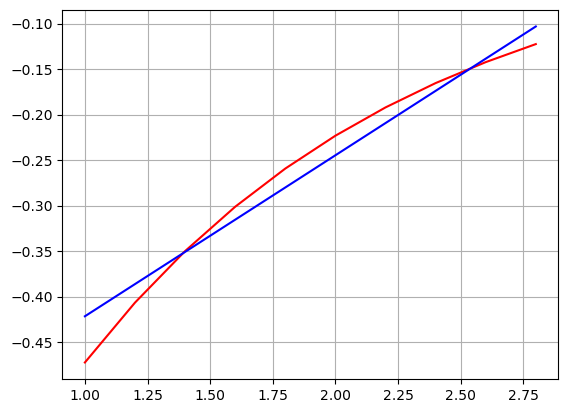

In [10]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
from numpy import exp

g1g1 = lambda x: 1
g1g2 = lambda x: x
g2g2 = lambda x: x**2
fg1 = lambda x: -math.exp(-0.75*x)
fg2 = lambda x: -x*math.exp(-0.75*x)

# Calcula os elementos das marizes
a11 = quad(g1g1, 1, 3)[0]
a12 = quad(g1g2, 1, 3)[0]
a22 = quad(g2g2, 1, 3)[0]
b1 = quad(fg1, 1, 3)[0]
b2 = quad(fg2, 1, 3)[0]



# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda x: a[0]+a[1]*x

# cria pontos (x, y) da reta 
Xr = np.arange(1, 3, 0.2)
#print (Xr)

#Y = np.exp(X)

# Plota os pontos e a reta
plt.plot(Xr, -np.exp(-0.75*Xr), "r-", Xr, g(Xr), "b-") 
plt.grid()
plt.show()

**Exemplo 2:** ([Burden, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/586)) Encontre o polinômio de aproximação por mínimos quadrados de segundo grau para a função $f(x)=\operatorname{sen} \pi x$ no intervalo $[0,1]$.


*Solução:* As equações normais para $P_2(x)=a_2 x^2+a_1 x+a_0$ são

$$
\begin{aligned}
a_0 \int_0^1 1 d x+a_1 \int_0^1 x d x+a_2 \int_0^1 x^2 d x & =\int_0^1 \operatorname{sen} \pi x d x \\
a_0 \int_0^1 x d x+a_1 \int_0^1 x^2 d x+a_2 \int_0^1 x^3 d x & =\int_0^1 x \operatorname{sen} \pi x d x \\
a_0 \int_0^1 x^2 d x+a_1 \int_0^1 x^3 d x+a_2 \int_0^1 x^4 d x & =\int_0^1 x^2 \operatorname{sen} \pi x d x
\end{aligned}
$$


Calculando as integrais, obtemos

$$
a_0+\frac{1}{2} a_1+\frac{1}{3} a_2=\frac{2}{\pi}, \quad \frac{1}{2} a_0+\frac{1}{3} a_1+\frac{1}{4} a_2=\frac{1}{\pi} \quad \text { e } \quad \frac{1}{3} a_0+\frac{1}{4} a_1+\frac{1}{5} a_2=\frac{\pi^2-4}{\pi^3} .
$$


Estas três equações em três incógnitas podem ser resolvidas a fim de se obter

$$
a_0=\frac{12 \pi^2-120}{\pi^3} \approx-0,050465 \quad \text { e } \quad a_1=-a_2=\frac{720-60 \pi^2}{\pi^3} \approx 4,12251
$$


Consequentemente, a aproximação polinomial por mínimos quadrados de segundo grau para $f(x)=\operatorname{sen} \pi x$ em $[0,1]$ é $P_2(x)=-4,12251 x^2+4,12251 x-0,050465$. 

### Exercícios

**1.** Encontre a aproximação polinomial por mínimos quadrados linear para $f(x)$ nos intervalos indicados se:

a. $f(x)=x^2+3 x+2$,$[0,1] ;$

b. $f(x)=x^3, \quad[0,2]$;

c. $f(x)=\frac{1}{x}, \quad[1,3]$;

d. $f(x)=e^x, \quad[0,2]$;

e. $f(x)=\frac{1}{2} \cos x+\frac{1}{3} \operatorname{sen} 2 x,[0,1]$;

f. $f(x)=x \ln x$, $[1,3]$.

**2.** Encontre a aproximação polinomial por mínimos quadrados linear no intervalo $[-1,1]$ para as seguintes funções:

a. $f(x)=x^2-2 x+3$

b. $f(x)=x^3$

c. $f(x)=\frac{1}{x+2}$

d. $f(x)=e^x$

e. $f(x)=\frac{1}{2} \cos x+\frac{1}{3} \operatorname{sen} 2 x$

f. $f(x)=\ln (x+2)$